In [2]:
# Base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# PyMC-related imports
import arviz as az

# Other imports
from numpy import pi as pi

# New plotting imports
import seaborn as sns

## Load the stacked - GPGP Model

This run: gpgp-model with exponential kernels

In [3]:
trace = az.from_netcdf(os.path.expanduser("~/Dropbox/1_proj/via/me/r1/outputs/covs/covs_routine_2k_573138.nc"))

In [4]:
stacked = trace.stack(sample=["chain", "draw"])

## Examine the basic results

<Axes: >

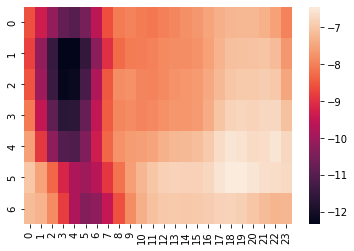

In [7]:
post_mean_mu = stacked.posterior['mu'].mean(axis = (1)).to_numpy()
sns.heatmap(post_mean_mu.reshape(7,24))

<Axes: >

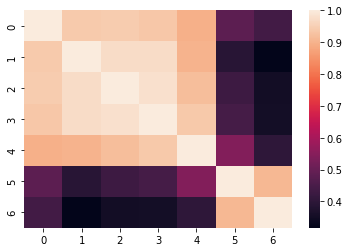

In [8]:
post_mean_daycorrs = stacked.posterior['eta_omega_corr'].to_numpy().mean(axis = (2))
sns.heatmap(post_mean_daycorrs)

In [13]:
az.summary(trace, "beta", hdi_prob=0.95)

arviz - WARNING - Shape validation failed: input_shape: (1, 400), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.010,0.013,-0.014,0.033,0.003,0.002,25.0,74.0,NaN
beta[1],-0.049,0.012,-0.075,-0.028,0.002,0.001,46.0,46.0,NaN
beta[2],-0.004,0.014,-0.032,0.020,0.003,0.002,29.0,61.0,NaN
beta[3],-0.007,0.010,-0.025,0.012,0.002,0.001,25.0,76.0,NaN
